In [1]:
#Projeto com Feedback 4 - Prevendo Customer Churn em Operadoras de Telecom (se o cliente vai cancelar ou não e qual a
#probabilidade de cada escolha)

In [56]:
#Importando os pacotes necessários
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [15]:
#Carregando os dados
df_treino= pd.read_csv("projeto4_telecom_treino.csv")

In [3]:
#Verificando as dimensões do dataset
df_treino.shape

(3333, 21)

In [5]:
#Verificando o tamanho do dataset
df_treino.size

69993

In [6]:
#Verificando os dados em formato de tabela
df_treino.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [7]:
#Análise exploratória dos dados
#Verificar se há correlação entre variáveis após a transformação
#Criar mais uma versão do modelo e dizer porque escolhi determinada versão. Usar o algoritmo de regressão logística.

In [8]:
#Análise exploratória dos dados
#Verificando os tipos de dados

df_treino.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [10]:
#Verificando se temos valores missing
df_treino.isnull().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [16]:
#Análise exploratória das variáveis numéricas
#Verificando qual período possui maior número de ligações (day, eve ou night).
day=df_treino['total_day_calls'].sum()
eve=df_treino['total_eve_calls'].sum()
night=df_treino['total_night_calls'].sum()
x=["Day", "Eve", "Night"]
y=[day, eve, night]

<BarContainer object of 3 artists>

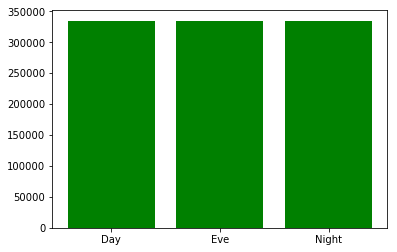

In [17]:
#Visualmente fica claro que não há um período de destaque para o total de ligações.
plt.bar(x,y, color="green")

In [18]:
#Verificando se tem algum período que se destaca no custo total
custo_day=df_treino['total_day_charge'].sum()
custo_eve=df_treino['total_eve_charge'].sum()
custo_night=df_treino['total_night_charge'].sum()
x1=["Charge Day", "Charge Eve", "Charge Night"]
y1=[custo_day, custo_eve, custo_night]

<BarContainer object of 3 artists>

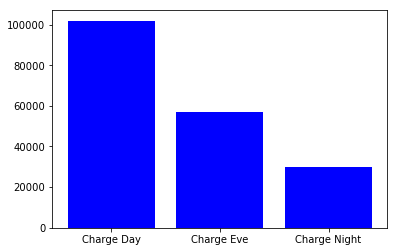

In [19]:
#Visualmente consegue-se perceber que o custo é maior nas ligações durante o dia.
plt.bar(x1,y1, color="blue")

In [20]:
#Verificando o comportamento por estado
state=df_treino.groupby('state')
ordena_state=state.size()
ordena_state.sort_values(ascending=False)

state
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
dtype: int64

In [21]:
state1=df_treino.set_index(['state', 'total_day_charge'])
state1

,,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,total_day_charge,,,,,,,,,,,,,,,,,,,
KS,45.07,1,128,area_code_415,no,yes,25,265.1,110,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
OH,27.47,2,107,area_code_415,no,yes,26,161.6,123,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
NJ,41.38,3,137,area_code_415,no,no,0,243.4,114,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
OH,50.90,4,84,area_code_408,yes,no,0,299.4,71,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
OK,28.34,5,75,area_code_415,yes,no,0,166.7,113,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
AL,37.98,6,118,area_code_510,yes,no,0,223.4,98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
MA,37.09,7,121,area_code_510,no,yes,24,218.2,88,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
MO,26.69,8,147,area_code_415,yes,no,0,157.0,79,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
LA,31.37,9,117,area_code_408,no,no,0,184.5,97,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no


In [22]:
state1=state1.groupby(level=['state', 'total_day_charge'])

In [23]:
state1.sum()

Unnamed: 0  account_length  number_vmail_messages  \
state total_day_charge                                                      
AK    9.89                     182             126                      0   
      12.89                   2270             138                     37   
      14.14                   1418             141                      0   
      17.02                    685             110                      0   
      17.51                    951             108                      0   
      21.03                    813             156                      0   
      22.42                   3138              58                      0   
      22.61                   1025             146                      0   
      23.09                   1885              51                     12   
      23.68                   2753              55                     39   
      24.43                   1590              76                      0   
      24.87                     37              36                     30   
      25.21                   2084              52                      0   
      25.23                   2102             110                      0   
      25.50                   1683              96                     29   
      25.64                   2628              86                      0   
      27.08                    506              41                      0   
      27.12                   1988              59                      0   
      27.22                   1261              76                     22   
      29.05                   1343              52                     24   
      29.33                   1163             173                      0   
      29.38                    551             111                      0   
      29.73                   1804             101                      0   
      29.78                   2476               1                      0   
      29.87                    954             132                     39   
      29.94                   2223              97                     24   
      30.33                   1225             120                      0   
      30.79                   2072             132                      0   
      30.86                    354             117                      0   
      30.99                    719             127                      0   
...                            ...             ...                    ...   
WY    33.22                   1833              68                      0   
      33.59                   2155             126                      0   
      34.12                    563              99                     28   
      35.05                   1362              64                      0   
      35.19                   2257              94                      0   
      35.22                    732              90                      0   
      35.72                   2916              58                      0   
      36.21                     27              57                     39   
      36.36                    757              33                      0   
      37.40                   2462              78                      0   
      37.57                   2671             116                     12   
      37.77                   2118             111                      0   
      38.05                   3173              41                      0   
      38.68                   2776             120                     24   
      39.03                   2680             145                      0   
      39.30                    669             171                      0   
      40.10                   1109             151                      0   
      40.27                   1338              97                      0   
      41.17                   4487             250                      0   
      41.31         

In [24]:
#Engenharia de atributos
#Removendo a coluna "account length" que não fará parte do modelo.
del df_treino['account_length']

In [13]:
#Verificando se deletou a coluna:
df_treino.head()

,Unnamed: 0,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [28]:
#Engenharia de atributos: transforando as colunas "international_plan", "voice_mail_plan" e "churn" para 0 e 1. Não=0, Sim=1
df_treino.loc[df_treino.international_plan=='no', 'int_plan']='0'
df_treino.loc[df_treino.international_plan=='yes', 'int_plan']='1'

In [30]:
df_treino.loc[df_treino.voice_mail_plan=='no', 'voice_mail_plan_new']='0'
df_treino.loc[df_treino.voice_mail_plan=='yes', 'voice_mail_plan_new']='1'

In [32]:
df_treino.loc[df_treino.churn=='no', 'churn_new']='0'
df_treino.loc[df_treino.churn=='yes', 'churn_new']='1'

In [33]:
df_treino.head()

,Unnamed: 0,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,int_plan,voice_mail_plan_new,churn_new
0,1,KS,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,no,0,1,0
1,2,OH,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,no,0,1,0
2,3,NJ,area_code_415,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,no,0,0,0
3,4,OH,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,no,1,0,0
4,5,OK,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,no,1,0,0


In [34]:
#Deletando as colunas antigas
del df_treino['international_plan']
del df_treino['voice_mail_plan']
del df_treino['churn']

In [44]:
del df_treino['area_code']

In [50]:
del df_treino['state']

In [79]:
del df_treino['Unnamed: 0']

In [80]:
df_treino.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,int_plan,voice_mail_plan_new,churn_new
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [37]:
# Verificando a distribuição da variável target (necessidade ou não de balanceamento de classes).
#Será necessário balancear as classes visto que há uma discrepância grande entre 0 e 1, mas vou treinar o modelo primeiro
#com as classes desbalanceadas para ver como se comporta.
df_treino.groupby('churn_new').size()

churn_new
0    2850
1     483
dtype: int64

In [52]:
#Criando um modelo de regressão logística
lr= LogisticRegression()

In [53]:
#Criando duas variáveis: X que contém os dados de treino e y que contém somente a variável "churn_new" (que queremos prever)
X = df_treino.drop("churn_new", axis = 1)
y = df_treino['churn_new']

In [54]:
#Separando os dados em treino e teste. Mantendo o default que será 70% para treino e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [57]:
#Treinamento do modelo
lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
#Fazendo as previsões e salvando na variável "y_pred"
y_pred = lr.predict(X_test)

In [59]:
#Verificando a acurácia do modelo
accuracy_score(y_test, y_pred)

0.8585131894484412

In [60]:
#Relatório de classificação. Pela métrica recall podemos ver que o modelo está enviesado.
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       713
           1       0.71      0.04      0.08       121

    accuracy                           0.86       834
   macro avg       0.79      0.52      0.50       834
weighted avg       0.84      0.86      0.80       834



In [81]:
#Reiniciando o processo agora com o balanceamento de classes
#Criando duas variáveis: X2 que contém os dados de treino e y2 que contém somente a variável "churn_new (que queremos prever)
X2 = df_treino.drop("churn_new", axis = 1)
y2 = df_treino['churn_new']

In [82]:
#Criando a variável "balance"
balance=SMOTE()

In [83]:
#Aplicando o método SMOTE para o balanceamento de classes
X2, y2 = balance.fit_resample(X2,y2)

In [84]:
#Dividindo novamente os dados entre treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 1, stratify=y2)

In [94]:
#Criando o segundo modelo
modelo2=LogisticRegression()

In [95]:
#Treino do modelo
modelo2.fit(X2_train, y2_train)

LogisticRegression()

In [96]:
#Previsões salvas na variável y2_pred
y2_pred = modelo2.predict(X2_test)

In [97]:
#Verificando a acurácia do modelo 2
result = modelo2.score(X2_test, y2_test)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 71.509%


In [98]:
print (classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       712
           1       0.71      0.73      0.72       713

    accuracy                           0.72      1425
   macro avg       0.72      0.72      0.71      1425
weighted avg       0.72      0.72      0.71      1425



In [ ]:
#A segunda versão do modelo é melhor apesar de ter apresentado um valor de acurácia mais baixo, visto que as classes
#foram balanceadas. Para decidir que esta versão do modelo é melhor, analisei também a métrica de recall.

In [102]:
# Fazendo as previsões e construindo a Confusion Matrix
previsoes = modelo2.predict(X2_test)
matrix = confusion_matrix(y2_test, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[458 254]
 [205 508]]


In [ ]:
#Interpretando a confusion matrix:
#458 vezes o modelo disse que o cliente cancelou o serviço e de fato o cliente tinha cancelado;
#254 vezes o modelo disse que o cliente não cancelou o serviço sendo que ele havia cancelado;
#205 vezes o modelo disse que o cliente havia cancelado o serviço sendo que não;
#508 vezes o modelo disse que o cliente não cancelou e de fato não havia cancelado.

#Com isso, podemos dizer que a % do cliente cancelar o serviço é de 